In [487]:
#importing datasets 

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import accuracy_score
import torch 
from sklearn import metrics

import seaborn as sns
import random 
import math


Importing Dataset


In [488]:
# importing datasets
X,y=load_svmlight_file("./std_data.txt")
X=pd.DataFrame(X.toarray())
y=pd.DataFrame(y)


Split Data to Train and Test set



In [489]:
class MyPerceptron :

    def __init__(self,X,y,bias=False):
           

          # initialising the weights
          # initialising the label with inputs
        self.lr=0.001 # initialising learning Rate
         # initialising the bias 
        # self.error # initialising empty array to store loss 
        self.train_acc=[]  
        self.test_acc=[]
        self.val_acc=[]
        self.s_train=[]
        self.s_val=[]
        self.s_test=[]
        
        self.best_weight=0
        self.accuracy_table=[]
        if bias:
            X=self.initalize_bias(X)
        rng = np.random.seed(123)
        self.weights=np.array(np.random.rand(1,X.shape[1]),)
        self.X_train,self.X_test,self.X_val,self.y_train,self.y_test,self.y_val = self.split_data(X,y)# initalisig the features with input           
      

    def initalize_bias(self,X):
        tr=np.ones((X.shape[0],1))
        X=np.hstack((X,tr))
        return X
    
    
    def  split_data(self,X,y):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y )
        X_train,X_val,y_train,y_val= train_test_split(X_train, y_train, test_size=0.2, random_state=42,stratify=y_train)
        
        return np.array(X_train), np.array(X_test),np.array(X_val), np.array(y_train), np.array(y_test),np.array(y_val)

    
        
    def zero_one_loss(self,X,weights,y):
        #step function which adds loss to missclassification 
        signum=y*(np.matmul(X,weights.T))
        if signum<=0:
            return 1
        else:
            return 0
    
    def hinge_loss(self,X,weights,y):
        # self.loss.append(max(0,1-y*(np.matmul(X,weights.T))))
        return max(0,1-y*(np.matmul(X,weights.T)))
    def perceptron_loss(self,X,weights,y):
        # self.loss.append(max(0,-y*(np.matmul(X,weights.T))))
        return max(0,-y*(np.matmul(X,weights.T)))


    def pred_accuracy(self,X, y):
        y_preds = self.predict(X)
        accuracy = accuracy_score(y_preds,y)
        return accuracy

    
    def train(self,loss_fxn,lr=0.01,epochs=30):
        # optimizing the weights to find the best descison boundry 
        for i in range(epochs):
            sum_of_errors=0
            for i in range(len(self.X_train)):
                sum_of_errors+=self.X_train[i]*self.y_train[i]*loss_fxn(self.X_train[i],self.weights,self.y_train[i])
            
            # model Evalauation parameters collection
            self.weights=self.weights+self.lr*(sum_of_errors)
            acc_train = self.pred_accuracy(self.X_train,self.y_train)
            acc_test=self.pred_accuracy(self.X_test,self.y_test)
            acc_val=self.pred_accuracy(self.X_val,self.y_val)
            self.train_acc.append(acc_train)  # train accuracy collection
            self.test_acc.append(acc_test) # test accuracy collection
            self.val_acc.append(acc_val) # validation accuracy collection
            self.s_train.append(self.loss(self.X_train,self.y_train,self.weights))
            self.s_val.append(self.loss(self.X_val,self.y_val,self.weights))
            self.s_test.append(self.loss(self.X_test,self.y_test,self.weights))
            self.accuracy_table.append({"weights":self.weights,"train_accuracy":acc_train,"test_accuracy":acc_test,"validation_accuracy":acc_val})
        return self.accuracy_table

        
        
    def loss(self,X, y, weights):
        #Loss values for the weights
        sum_loss = 0
        for x_i, y_i in zip(X, y):
            sum_loss += self.zero_one_loss(x_i, weights, y_i)
        return sum_loss/X.shape[0]  
    
    
    def predict(self,X):
        #predicts the class based on the input features 
        y_pred=np.matmul(X,self.weights.T)
        y_pred[y_pred>0]=1
        y_pred[y_pred<0]=-1
        return y_pred
            
       
    def conf_matrix(self):
        cf_matrix = confusion_matrix(self.y_test,self.predict(X_test))
        sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
        fmt='.2%', cmap='Blues')
                   
    def get_loss_curve(self):
        plt.plot(self.s_train,label="Training Loss")
        plt.plot(self.s_val,label="Validation Loss")
        plt.plot(self.s_test,label="Test Loss")
        plt.legend()

    def plot_some(self):
        plt.plot(self.error)
        print(len(self.error))
        plt.show()
    def  plot_acc(self):
        plt.plot(self.train_acc,label="training Accuracy")
        plt.plot(self.test_acc,label="testing accuracy")
        plt.plot(self.val_acc,label="validation accuracy")
      
        plt.legend()
        
    def get_conf(self):
        cf_matrix = confusion_matrix(self.y_test,b.predict(self.X_test))
        sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

   
    def get_best_weights(self,accuracy_table):
            return sorted(accuracy_table,key=lambda k: k['validation_accuracy'])[-1]['validation_accuracy']
    def hypertune_model(self,loss_fxn):
        params=[]
        for i in range(1,5):
            lrs=math.pow(10,-i)
            for epoch in range(5,30,2):
                best_parametrs={}
                accuracy_table=self.train(loss_fxn,lr=lrs,epochs=epoch)
                best_parametrs['accuracy']=self.get_best_weights(accuracy_table)
                best_parametrs['lr']=lrs
                best_parametrs['epochs']=epoch
                params.append(best_parametrs)
        return params
    
    def plot_hyper(self,loss_fxn):
        params=self.hypertune_model(loss_fxn)
        acc=[d['accuracy'] for d in params]
        epoch=[d['epochs'] for d in params]
        lr=[d['lr'] for d in params]
        plt.plot(lr,acc)


   



        
                


        
    
        


           
                
        
        

            



## Section 1 - Effects of Bias Term in Algorithm

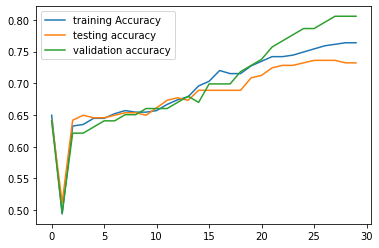

In [490]:
b=MyPerceptron(X,y,True)
b.train(b.hinge_loss)
b.plot_acc()



1.1 Mean Accuracy of the Model With Bias Term

In [491]:
mean_test_acc_withbias=np.mean(b.test_acc)
mean_test_acc_withbias

0.6826771653543308

Model With Bias Term

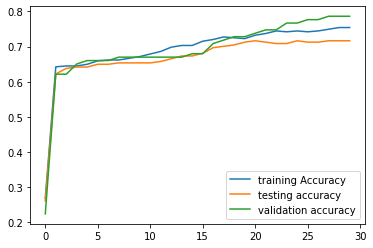

In [492]:
b2=MyPerceptron(X,y,False)
b2.train(b2.hinge_loss)
b2.plot_acc()

1.2 Mean Accuracy of the model with out Bias Term

In [493]:
mean_test_accuracywithout=np.mean(b2.test_acc)
mean_test_accuracywithout

0.6673228346456693

In [494]:
np.array(mean_test_acc_withbias)-np.array(mean_test_accuracywithout)

0.015354330708661434

## Section 2 - Effects of Loss Functions in the Algortihm 

2.1 Hinge Loss

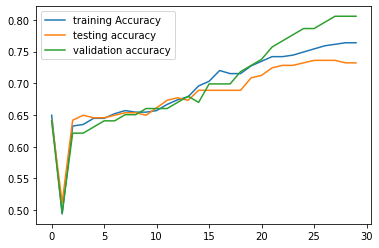

In [495]:
b=MyPerceptron(X,y,True)
b.train(b.hinge_loss)
b.plot_acc()



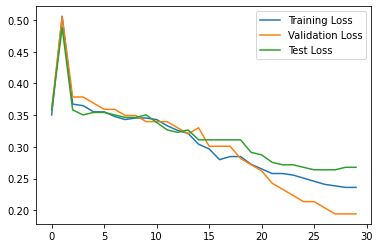

In [496]:
b.get_loss_curve()

2.2 Perceptron Loss

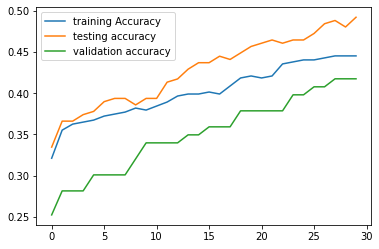

In [497]:
b2=MyPerceptron(X,y,True)
b2.train(b2.perceptron_loss)
b2.plot_acc()

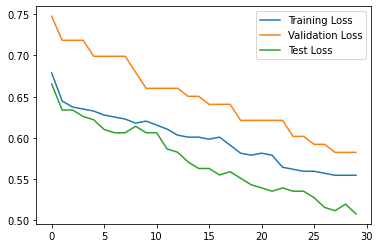

In [498]:
b2.get_loss_curve()


2.3  Zero One Loss


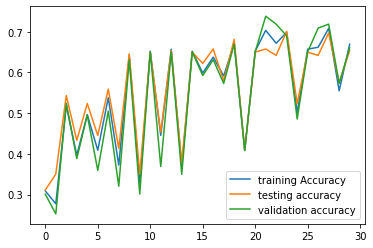

In [499]:
b3=MyPerceptron(X,y,True)
b3.train(b3.zero_one_loss)
b3.plot_acc()

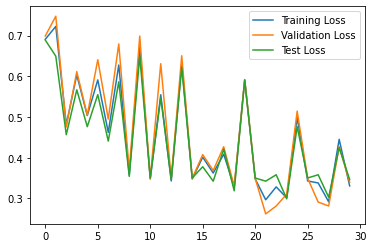

In [500]:
b3.get_loss_curve()